# Data Visualization - Of Scatter, Bars, and Pies

## Pandas Based Visualization

We looked at some basic visualization techniques in slide set [05 Processing Pipeline](05-processing-pipeline.ipynb).  The good news is that Pandas dataframes know how to do a lot of predefined visualization.

Give ourselves access to matplotlib as the underlying visualization library:

In [1]:
%matplotlib inline

Get our Pandas DataFrames:

In [2]:
import pandas as pd

Get our data set:

In [3]:
iris_df = pd.read_csv("assets/iris.csv")

In [4]:
iris_df.head()

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [5]:
iris_df.drop(['id'], axis=1, inplace=True)

## Basic Plots

Arguably the most important plots, that is, plots that data scientists most frequently use are:
* The **histogram** for displaying basic distribution information of numeric columns.
* The **bar plot** for displaying basic mode information for categorical columns.
* The **scatter plot** for displaying basic relationships between two variables.

### The **Histogram**

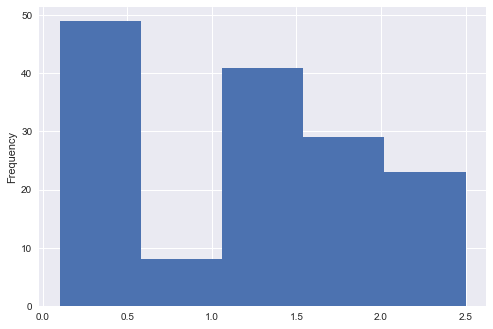

In [23]:
iris_df.loc[:,'Petal.Width'].plot.hist(bins=5)

### The Density Plot

An alternative to histograms are density plots (kernel density estimators - kde) which display the same information in a continuous format.

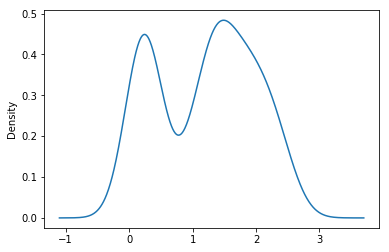

In [7]:
iris_df.loc[:,'Petal.Width'].plot.kde()

### The **Bar Chart**

Here we have to do some preprocessing before we can plot the levels of the column - we have to actually count the number of times particular levels occur in a categorical column.  The  function `value_counts` can be applied the categorical columns which creates a table of the number of times each label occurred in a column.

In [8]:
iris_df.loc[:,'Species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

Let's build the graph.

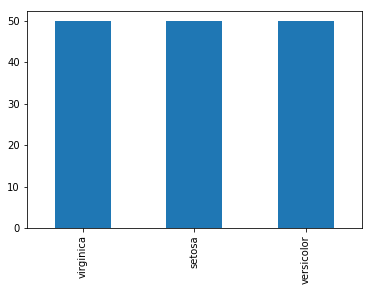

In [9]:
iris_df.loc[:,'Species'].value_counts().plot.bar()

### The Pie Chart

The same information as the bar chart can be displayed in a visually appealing **pie chart**.  The only caveat 
here is that we want to get rid of the column/series name because the package displays it in kind of a strange fashion.

In [10]:
plot_series = iris_df.loc[:,'Species'].rename('') # get rid of the 'Species' label

Remember: a *series* is just a 1-D dataframe.

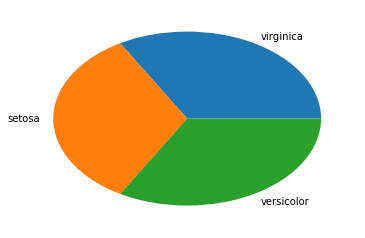

In [11]:
plot_series.value_counts().plot.pie() # plot the value counts of the labels

### Scatter Plots

Scatter plots allow us to examine the relationship between columns in a dataframe.

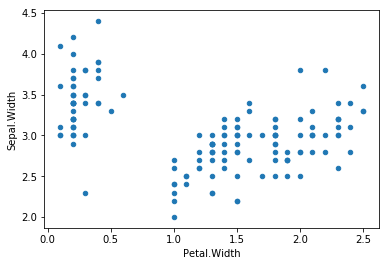

In [12]:
iris_df.plot.scatter(x='Petal.Width', y='Sepal.Width')

As you can see, this is a powerful visualization technique by showing us that based on these two columns we basically can classify the iris dataset into two very well defined clusters.

### Scatter Matrix

Rather than looking at each column pair individual the `scatter_matrix` function allows the user view all the pairwise relationships in one go.

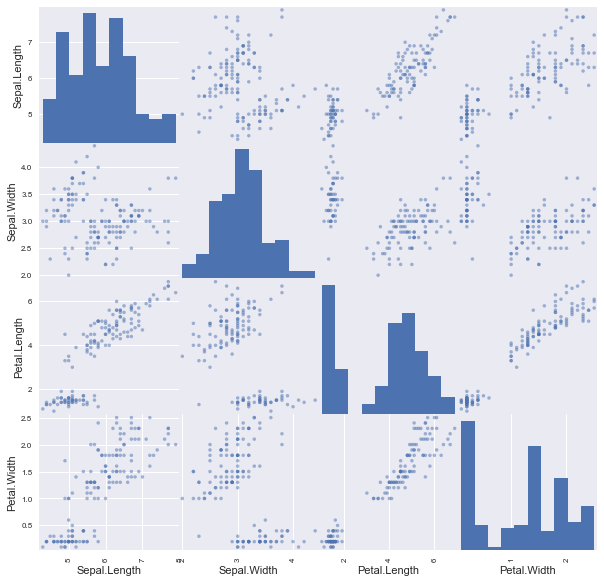

In [25]:
null = pd.plotting.scatter_matrix(iris_df, figsize=[10,10])

### Basic Plotting Summary

* ‘bar’ or ‘barh’ for bar plots
* ‘hist’ for histogram
* ‘box’ for boxplot
* ‘kde’ or 'density' for density plots
* ‘area’ for area plots
* ‘scatter’ for scatter plots
* ‘hexbin’ for hexagonal bin plots
* ‘pie’ for pie plots

For more info [Pandas Basic Plotting](https://pandas.pydata.org/pandas-docs/stable/visualization.html#basic-plotting-plot).

## Seaborn Based Visualization

[Seaborn](http://seaborn.pydata.org) is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.  Seaborn integrates nicely with Pandas dataframes.

In [14]:
import seaborn as sns
sns.set()

Let's repeat the experiments from above but with Seaborn.

In [15]:
iris_df = pd.read_csv("assets/iris.csv")
iris_df.drop(['id'], axis=1, inplace=True)

### Histograms

In the Seaborn world this is done with [`distplot`](http://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot).

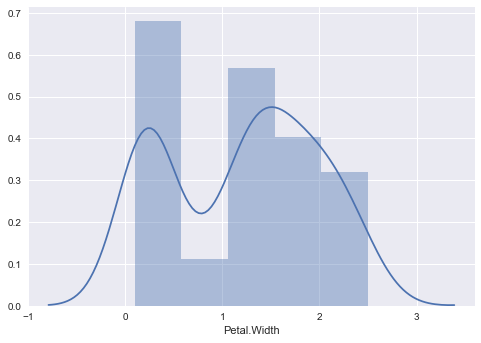

In [26]:
sns.distplot(iris_df.loc[:,'Petal.Width'], hist=True, kde=True, bins=5)

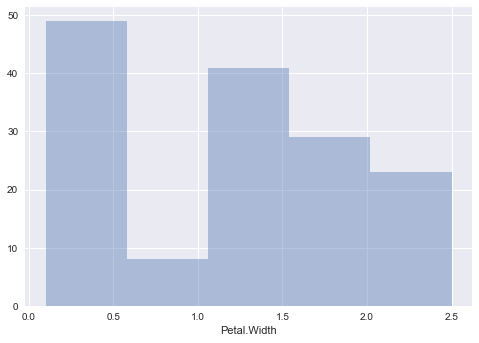

In [28]:
sns.distplot(iris_df.loc[:,'Petal.Width'], hist=True, kde=False, bins=None)

**Note**: if you do not specify *bins* then `distplot` will use the Freedman-Diaconis rule to compute the optimal number of bins for the data.

### Bar Charts

Seaborn also supports bar charts called [`countplots`](http://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot).

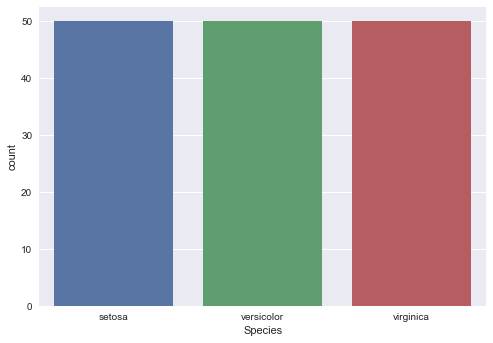

In [18]:
sns.countplot(iris_df.loc[:,'Species'])

Notice that there is not preprocessing necessary compared to the Pandas bar charts.

### Scatter Plots

Seaborn does things just a bit different than expected...scatter plots are called [`pairplots`](http://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot).

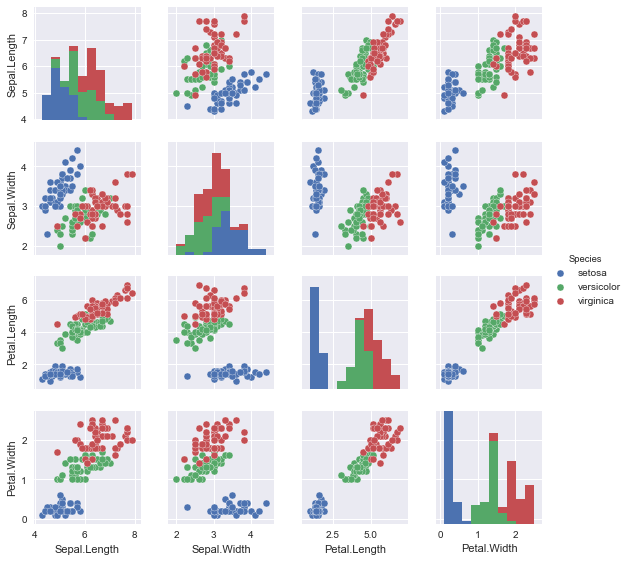

In [19]:
sns.pairplot(iris_df, hue='Species', size=2)

We can also look at individual pairs of variables.

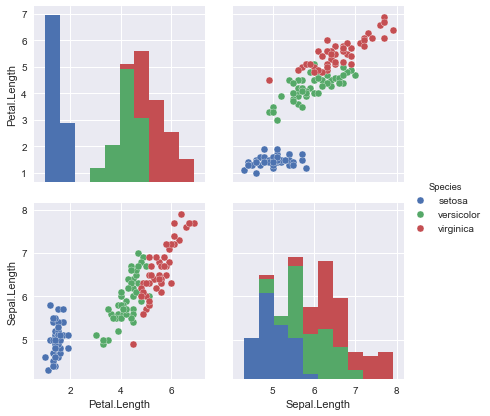

In [20]:
sns.pairplot(iris_df, hue='Species', size=3, vars=["Petal.Length", "Sepal.Length"])

Seaborn has another plot called the [`jointplot`](http://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot) that allows you to compare two variables.  Here is one that draws a scatterplot with marginal histograms.

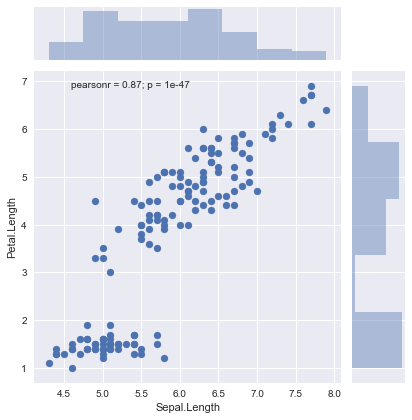

In [30]:
sns.jointplot(x="Sepal.Length", y="Petal.Length", data=iris_df, size=6)

Same thing as a density plot.

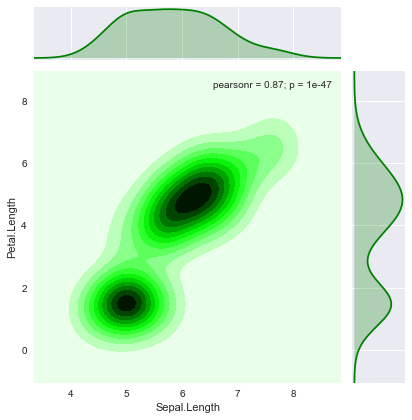

In [22]:
sns.jointplot(x="Sepal.Length", y="Petal.Length", data=iris_df, size=6, kind="kde", color="g")

# Reading

* 4.5 [Histograms, Binnings, and Density](https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html)
* 4.14 [Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)
* [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
* [Seaborn Homepage](http://seaborn.pydata.org/index.html)


# Team Project

In this project you will work with your last team to explore the second data set that you had to pick for the last assignment.

1. Use the visualization tools presented in this slide set to look at the data set. Are your independent variables uni- or multimodal? Can you identify clusters when performing scatter plots?  Are those clusters related to your decision tree model? What about the different levels of your dependent variable - are they equally represented?

2. Find the simplest decision tree model whose accuracy is only 10% worse than the best model you can build.  How does the best decision tree model and your new model compare in terms of interpretability?  Do they agree on the major trends?
